<a href="https://colab.research.google.com/github/maquico/IA-IDS330/blob/main/ids330L_04_aprendizaje_maquina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje de Máquina

## 1. Regresión Lineal

La regresión lineal es un método utilizado en estadística para entender la relación entre dos variables. Imagina que tienes dos conjuntos de datos, uno se llama variable independiente (X) y otro se llama variable dependiente (Y). La regresión lineal busca encontrar una línea recta que mejor se ajuste a esos datos.

Esta línea recta se llama "línea de regresión" y se representa mediante una ecuación de la forma Y = aX + b. Aquí, "a" representa la pendiente de la línea, que indica cuánto cambia la variable dependiente (Y) cuando la variable independiente (X) aumenta en una unidad. "b" es el punto de intersección de la línea con el eje Y, y muestra el valor de Y cuando X es igual a cero.

El objetivo de la regresión lineal es encontrar los valores de "a" y "b" que minimicen la distancia entre los puntos de datos y la línea de regresión. Esto nos permite predecir los valores de Y para nuevos valores de X basándonos en la relación lineal encontrada.

En esta práctica vamos a utilizar el algoritmo de regresión lineal para encontrar la relación entre dos variables. Para ello tenemos que:

1. Seleccionar los datos.
2. Definir nuestro modelo.
3. Entrenar el modelo en base a los datos.
4. Validar nuestro modelo entrenado.

---

Pregunta: ¿Esto solo funciona para valores numericos?

Respuesta: Se debe convertir el valor no numerico a numerico:

```
Valores categoricos a numerico
Forma 1
usa -> 0
mexico -> 1
RD -> 2

Forma 2 (one hot encoding)
usa -> [0, 0, 1]
mexico -> [0, 1, 0]
RD -> [1, 0, 0]

Texto a numero
1. Sacar metricas estadisticas del texto (e.g., frecuencia de alguna palabra, cantidad de veces que se repite una palabra, etc.)

"El año pasado me pase la navidad en familia. Me gusta la navidad, pero he engordado ese año"

=> {abanico: 0, navida: 2, familia: 1, año: 2}
=> [0, 2, 0, ..., 1, ..., 2]

2. Redes Neuronales (word2vec)
"El año pasado me pase la navidad en familia. Me gusta la navidad, pero mi padre y yo hemos engordado ese año"

"año" -> red neuronal -> [0.2, 0.4, ..., 0.6]
"familia" -> red neuronal -> [0.5, 0.8, ..., 0.1]
"padre" -> red neuronal -> [0.6, 0.8, ..., 0.2]

```

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = sn.load_dataset('mpg')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
target = 'mpg'

In [ ]:
data.corr()

<ipython-input-3-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


In [ ]:
# randomizar el orden de la data
data = data.sample(n=len(data))

n = len(data)
train_n = int(n * 0.8)  # 80%
train_data = data[:train_n]
test_data = data[train_n:]

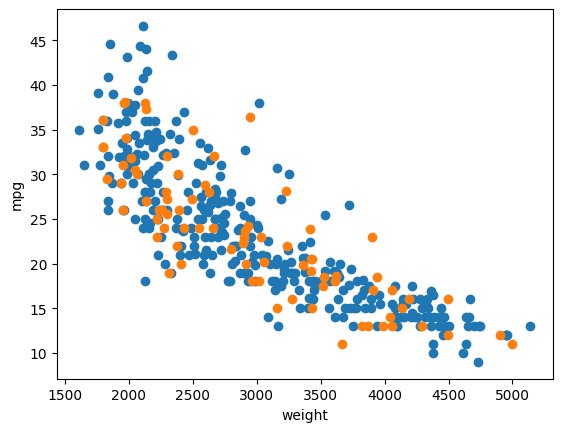

In [ ]:
attribute = 'weight'
target = 'mpg'

x_train = train_data[attribute].values
y_train = train_data[target].values

x_test = test_data[attribute].values
y_test = test_data[target].values

plt.scatter(x_train,y_train)
plt.scatter(x_test, y_test)
plt.xlabel(attribute)
plt.ylabel(target)
plt.show()

La "línea de regresión" se representa mediante una ecuación de la forma $Y = θ_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$ o $Y = Θ \cdot X$.

En inteligencia artificial, una hipótesis es una suposición o conjetura sobre una relación entre variables o características que se utiliza para formular un modelo o algoritmo. En el contexto del aprendizaje automático, una hipótesis se refiere a una función o modelo matemático propuesto que intenta capturar la relación subyacente entre las variables de entrada y salida.

Entonces, dada nuestra data, la hipótesis está definida por la siguiente ecuación:

$h = \theta_1 x + \theta_0$

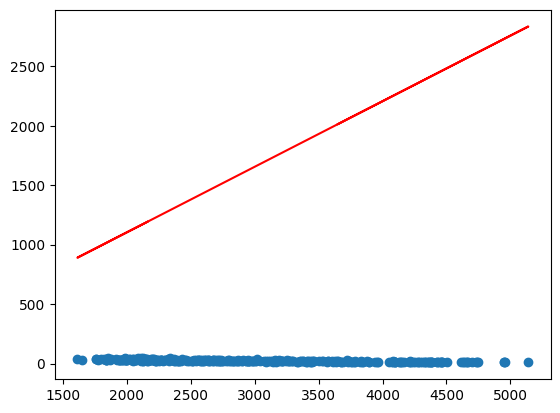

In [ ]:
# Modelo
theta_0 = np.random.random()
theta_1 = np.random.random()

h = theta_0 + theta_1 * x_train

plt.scatter(x_train, y_train)
plt.plot(x_train, h, 'red')
plt.show()

In [ ]:
# Funcion de error
def mse(y, h):
    # sum = []
    # n = len(y)
    # for i in range(n):
    #     sum += (y[i] - h[i])**2
    # return sum/n
    return ((y - h)**2).mean()

```
d_theta_0 = - 2 * (y - h).sum()
d_theta_1 = - 2 * (y - h).dot(x)
```

In [ ]:
# Proceso de entrenamiento

learning_rate = 0.0001
epochs = 1000

attribute = 'weight'
target = 'mpg'

x_train = train_data[attribute].values
x_train = (x_train - x_train.min())/(x_train.max() - x_train.min())
y_train = train_data[target].values

x_test = test_data[attribute].values
y_test = test_data[target].values

error_list = []
theta_0 = np.random.random()
theta_1 = np.random.random()
for epoch in range(0, epochs):
    h = theta_0 + theta_1 * x_train
    error = mse(y_train, h)
    error_list.append(error)

    if epoch%100==0:
        print(error)

    d_theta_0 = - 2 * (y_train - h).sum()
    d_theta_1 = - 2 * (y_train - h).dot(x_train)

    # modificando parametros
    theta_0 = theta_0 - learning_rate * d_theta_0
    theta_1 = theta_1 - learning_rate * d_theta_1





587.3648639152674
58.082514956812744
39.6441767302507
29.958152504888663
24.869861205050793
22.196864756798945
20.792678244797433
20.05502677437499
19.667521491304868
19.46395605365819


In [ ]:
print(f"El model es h = {theta_1}*x + {theta_0}")

El model es h = -25.939344936889913x + 33.56427849196627


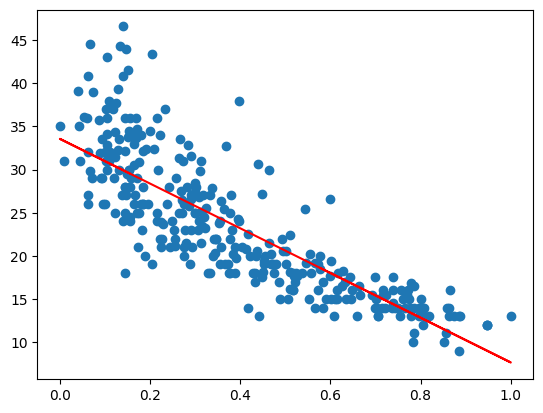

In [ ]:
h = theta_0 + theta_1 * x_train

plt.scatter(x_train, y_train)
plt.plot(x_train, h, 'red')
plt.show()

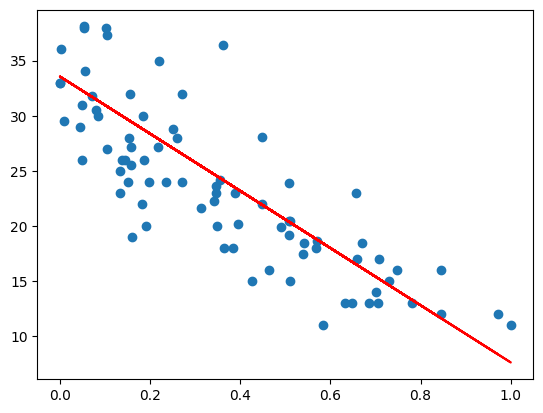

In [ ]:
# Evaluar el modelo
x_test = (x_test - x_test.min())/(x_test.max() - x_test.min())
h = theta_0 + theta_1 * x_test

plt.scatter(x_test, y_test)
plt.plot(x_test, h, 'red')
plt.show()

In [ ]:
x_new = 3000
x_new_norm = (3000 - 1500)/(5000 - 1500)
pred = theta_0 + theta_1 * x_new_norm
print(f"Weight: {x_new}. Normalizado: {x_new_norm}. MPG: {pred}")

Weight: 3000. Normalizado: 0.42857142857142855. MPG: 22.44741637615631


## 2. Regresión Logistica => Parte 1

Objetivo: clasificar las observaciones como "setosa" o "no setosa"

In [ ]:
data = sn.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

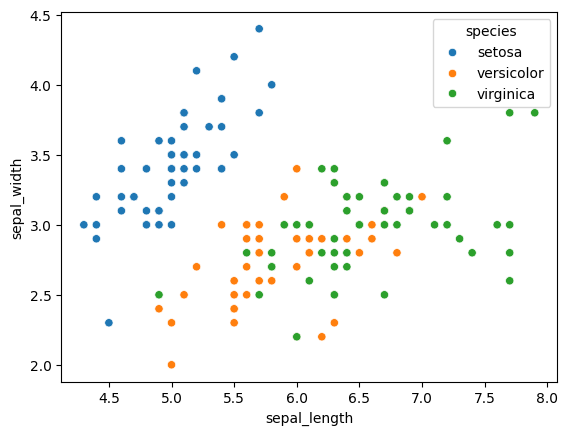

In [ ]:
sn.scatterplot(data=data, x='sepal_length', y='sepal_width', hue='species')

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

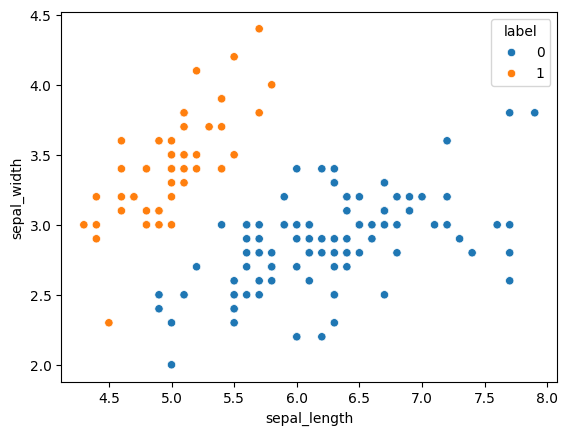

In [ ]:
data['label'] = [1 if specie == 'setosa' else 0 for specie in data['species']]
sn.scatterplot(data=data, x='sepal_length', y='sepal_width', hue='label')

### 2.1. Elegir 2 atributos (e.g., sepal_width, sepal_length)

### 2.2. Dividir la data en training / testing

### 2.3. Definir el modelo

$h = \frac{1}{1 + e^{-z}}$

$z = \theta_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2$

### 2.4. Función de error (entropia cruzada)

### 2.5. Entrenar
* No tienen que normalizar la data

### 2.6. Evaluar el modelo

In [ ]:
"""
m = -(theta_1 / theta_2)
b = -(theta_0 / theta_2)

sns.scatterplot(x=x_test[:,0], y=x_test[:,1], hue=y_test)
ax = plt.gca()
x_values = np.array(ax.get_xlim())
y_values = b + m * x_values
plt.plot(x_values, y_values, ls='--', c='k')
plt.fill_between(x_values, y_values, 2, color='tab:orange', alpha=0.2)
plt.fill_between(x_values, y_values, 4.5, color='tab:blue', alpha=0.2)
plt.xlim(x_values[0], x_values[1])
plt.ylim(2, 4.5)
plt.xlabel(attributes[0])
plt.ylabel(attributes[1])
plt.show()
"""

## 3. Aprendizaje no Supervisado: K-means

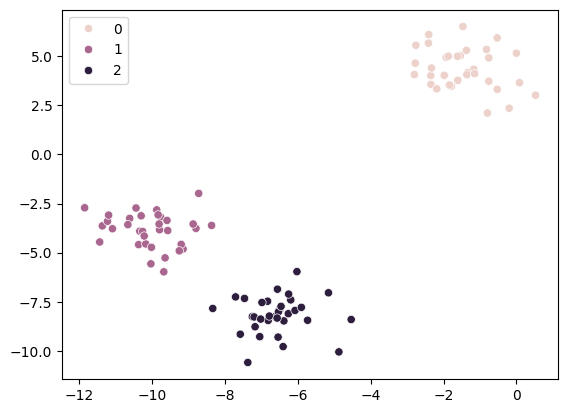

In [ ]:
from sklearn import datasets

x, y = datasets.make_blobs(random_state=1)
sn.scatterplot(x=x[:,0], y=x[:,1], hue=y)
plt.show()

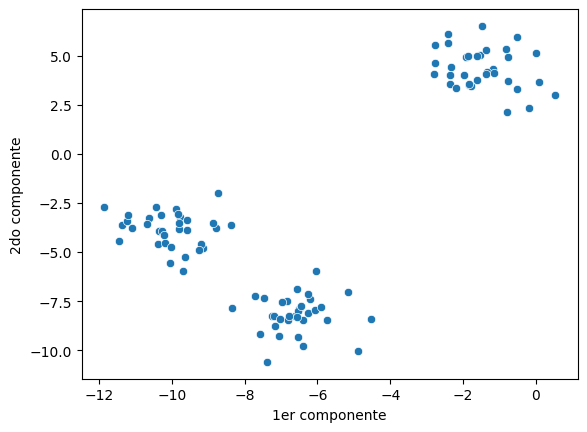

In [ ]:

sn.scatterplot(x=x[:,0], y=x[:,1])
plt.xlabel("1er componente")
plt.ylabel("2do componente")
plt.show()

In [ ]:
def initialize_centroids(k, x):
    m, n = x.shape
    centroids = np.empty((k,n))
    for i in range(k):
        centroids[i] = x[np.random.choice(range(m))]
    return centroids

In [ ]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [ ]:
def closest_centroid(x, centroids, k):
    distances = np.empty(k)
    for i in range(k):
        distances[i] = euclidean_distance(centroids[i], x)
    return np.argmin(distances)

In [ ]:
def create_clusters(x, centroids, k):
    m, n = np.shape(x)
    cluster_idx = np.empty(m)  # una lista de m numeros porque hay m cantidad de datos
    for i in range(m):
        cluster_idx[i] = closest_centroid(x[i], centroids, k)
    return cluster_idx

In [ ]:
def compute_means(cluster_idx, x, k):
    m, n = np.shape(x)
    centroids = np.empty((k, n))
    for i in range(k):
        points = x[cluster_idx==i]
        centroids[i] = np.mean(points, axis=0)
    return centroids

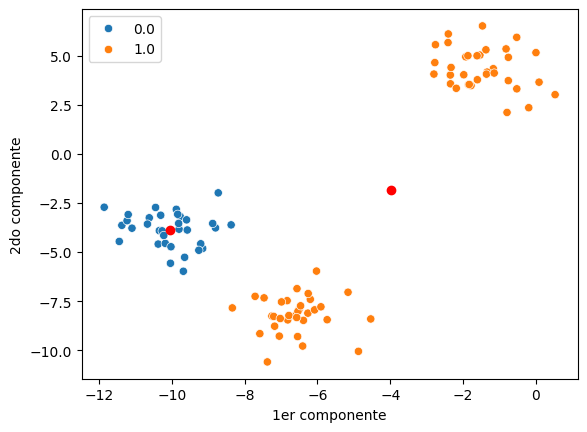

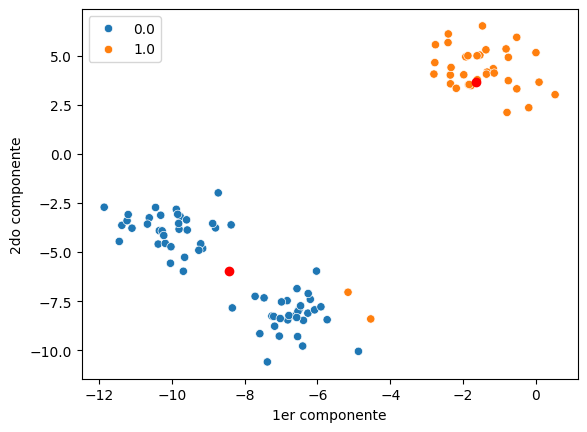

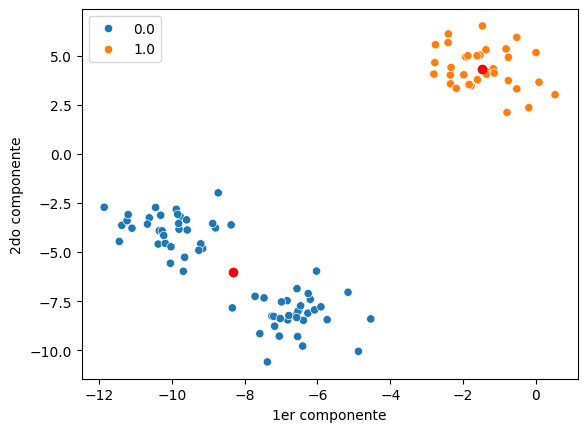

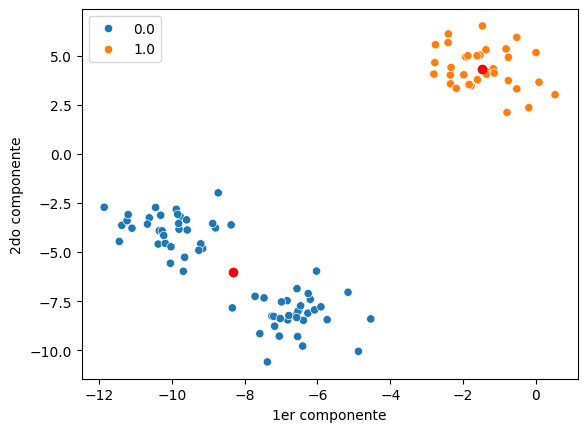

In [ ]:
k = 2 # [abnormal, normal]
epochs = 10

centroids = initialize_centroids(k=k, x=x)

for epoch in range(epochs):

    clusters = create_clusters(centroids=centroids, k=k, x=x)
    previous_centroids = centroids
    centroids = compute_means(cluster_idx=clusters, k=k, x=x)


    sn.scatterplot(x=x[:,0], y=x[:,1], hue=clusters)
    for c in centroids:
        plt.plot(c[0], c[1], 'ro')
    plt.xlabel("1er componente")
    plt.ylabel("2do componente")
    plt.show()

    diff = previous_centroids - centroids
    if not diff.any():
        break



## 4. Arbol de Decision (Regresión)

In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split

data = sn.load_dataset('mpg')
print(data.shape)
data = data.dropna()
print(data.shape)
data.head()

(398, 9)
(392, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
all_features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
target = 'mpg'
x = data[all_features].values
y = data[target].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
# dt: decision_tree
dt = tree.DecisionTreeRegressor(random_state=1, max_depth=3)
dt = dt.fit(x_train, y_train)

In [ ]:
y_pred = dt.predict(x_test)
mse(y_test, y_pred)

22.239426774266782

In [ ]:
def tree_to_rules(dt, all_features):
  tree_ = dt.tree_
  feature_names = [
    all_features[i] if i != tree._tree.TREE_UNDEFINED else 'undefined'
    for i in tree_.feature
  ]

  def recurse(node, depth):
    indent = "- " * depth
    if tree_.feature[node] != tree._tree.TREE_UNDEFINED:
      name = feature_names[node]
      threshold = tree_.threshold[node]
      print(f"{indent}if {name} <= {threshold:.2f}:")
      recurse(tree_.children_left[node], depth + 1)
      print(f"{indent}else:  # if {name} > {threshold:.2f}")
      recurse(tree_.children_right[node], depth + 1)
    else:
      print(f"{indent}return >>> {tree_.value[node]}")

  recurse(0, 0)

tree_to_rules(dt, all_features)

if displacement <= 190.50:
- if horsepower <= 70.50:
- - if horsepower <= 47.00:
- - - return >>> [[26.]]
- - else:  # if horsepower > 47.00
- - - return >>> [[33.79661017]]
- else:  # if horsepower > 70.50
- - if horsepower <= 90.50:
- - - return >>> [[26.95974026]]
- - else:  # if horsepower > 90.50
- - - return >>> [[23.59361702]]
else:  # if displacement > 190.50
- if horsepower <= 127.00:
- - if displacement <= 327.00:
- - - return >>> [[18.77884615]]
- - else:  # if displacement > 327.00
- - - return >>> [[24.8]]
- else:  # if horsepower > 127.00
- - if weight <= 4361.50:
- - - return >>> [[15.22653061]]
- - else:  # if weight > 4361.50
- - - return >>> [[12.9]]


## 5. Arbol de Decision (Clasificación) -> Tarea parte 2

Utilizando un arbol de decision (scikit-learn), desarrollen un modelo para predecir la especie de la flor basado en [sepal_length, sepal_width, petal_length, petal_width]

In [ ]:
data = sn.load_dataset('iris')
data = data.dropna()
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
